# SUYASH PRATAP SINGH

## Performing Exploratory Data Analysis on Pubg Dataset

![](image/img1.jpg)

![](image/img2.jpg)

### Table of Contents

**1. Description about the dataset**

**2. Import Statements**

**3. Performing Basic Pandas operations**

**4. Performing EDA**

**i). Univariate Analysis**

**ii). Bivariate Analysis**

**5. Conclusion**

### 1. Description about the Dataset

>In a PUBG game, up to 100 players start in each match (matchId). Players can be on teams (groupId) which get ranked at the end of the game (winPlacePerc) based on how many other teams are still alive when they are eliminated. In game, players can pick up different munitions, revive downed-but-not-out (knocked) teammates, drive vehicles, swim, run, shoot, and experience all of the consequences -- such as falling too far or running themselves over and eliminating themselves.
You are provided with a large number of anonymized PUBG game stats, formatted so that each row contains one player's post-game stats. The data comes from matches of all types: solos, duos, squads, and custom; there is no guarantee of there being 100 players per match, nor at most 4 players per group.


#### Data fields and their description

* **DBNOs** - Number of enemy players knocked.

* **assists** - Number of enemy players this player damaged that were killed by teammates.

* **boosts** - Number of boost items used.

* **damageDealt** - Total damage dealt. Note: Self inflicted damage is subtracted.

* **headshotKills** - Number of enemy players killed with headshots.
* **heals** - Number of healing items used.
* **Id** - Player’s Id
* **killPlace** - Ranking in match of number of enemy players killed.
* **killPoints** - Kills-based external ranking of players. (Think of this as an Elo ranking where only kills matter.) 
    If    there   is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.
* **killStreaks** - Max number of enemy players killed in a short amount of time.
* **kills** - Number of enemy players killed.
* **longestKill** - Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.
* **matchDuration** - Duration of match in seconds.
* **matchId** - ID to identify matches. There are no matches that are in both the training and testing set.
* **matchType** - String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”,    “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.
* **rankPoints** - Elo-like ranking of players. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes the place of “None”.
* **revives** - Number of times this player revived teammates.
* **rideDistance** - Total distance traveled in vehicles measured in meters.
* **roadKills** - Number of kills while in a vehicle.
* **swimDistance** - Total distance traveled by swimming measured in meters.
* **teamKills** - Number of times this player killed a teammate.
* **vehicleDestroys** - Number of vehicles destroyed.
* **walkDistance** - Total distance traveled on foot measured in meters.
* **weaponsAcquired** - Number of weapons picked up.
* **winPoints** - Win-based external ranking of players. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.
* **groupId** - ID to identify a group within a match. If the same group of players plays in different matches, they will   have a different groupId each time.
* **numGroups** - Number of groups we have data for in the match.
* **maxPlace** - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.
* **winPlacePerc** - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.


### 2. Import Statements

In [23]:
## import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()
from scipy.stats import norm, kstest
from scipy.stats import kurtosis, skew
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

### 3. Performing Basic Pandas operation

In [2]:
## read the dataset
df = pd.read_csv('data.csv')
print("data read successfully!!")

data read successfully!!


In [3]:
## print the few rows of data

df.head()

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2093518,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,...,0,0.0,0,0.0,0,0,151.30,1,1525,0.0667
1,3701672,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,...,0,0.0,0,0.0,0,0,1918.00,7,1516,0.5862
2,2059784,9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.73,0,0,0,...,0,4088.0,0,0.0,0,0,820.00,7,0,0.8105
3,1302036,b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0,0,0.00,0,0,0,...,1,0.0,0,0.0,0,0,38.81,0,1515,0.5556
4,297180,d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0,2,100.00,0,0,3,...,0,918.4,0,0.0,0,0,1721.00,5,0,0.6429


In [4]:
## print column names

df.columns

Index(['Unnamed: 0', 'Id', 'groupId', 'matchId', 'assists', 'boosts',
       'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'killPlace',
       'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration',
       'matchType', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc'],
      dtype='object')

In [5]:
## drop the unnamed:0 column

df.drop('Unnamed: 0', axis  = 1, inplace =True)

In [6]:
## print the few samples of dataset

df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,84,...,0,0.0,0,0.0,0,0,151.30,1,1525,0.0667
1,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,57,...,0,0.0,0,0.0,0,0,1918.00,7,1516,0.5862
2,9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.73,0,0,0,50,...,0,4088.0,0,0.0,0,0,820.00,7,0,0.8105
3,b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0,0,0.00,0,0,0,56,...,1,0.0,0,0.0,0,0,38.81,0,1515,0.5556
4,d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0,2,100.00,0,0,3,31,...,0,918.4,0,0.0,0,0,1721.00,5,0,0.6429


In [7]:
## lets check for missing values

df.isna().sum()


Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [8]:
# We have 1 Nan in our target variable
df[df['winPlacePerc'].isna() == True]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
184895,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [9]:
# Lets have a look at all the players in this match
matchId = '224a123c53e008'
data = df[df['matchId'] == matchId]
data

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
184895,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


>There is only 1 player identified in this match (matchID = 224a123c53e008). Since there needs to be more than one player to play the game in order to win, we make the assumption that this matchID is invalid. So, we will remove this match from the training set.

In [15]:
df = df[df['winPlacePerc'].isna() != True]



In [16]:
## shape of data

df.shape

(1111741, 29)

In [17]:
## information about dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1111741 entries, 0 to 1111741
Data columns (total 29 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Id               1111741 non-null  object 
 1   groupId          1111741 non-null  object 
 2   matchId          1111741 non-null  object 
 3   assists          1111741 non-null  int64  
 4   boosts           1111741 non-null  int64  
 5   damageDealt      1111741 non-null  float64
 6   DBNOs            1111741 non-null  int64  
 7   headshotKills    1111741 non-null  int64  
 8   heals            1111741 non-null  int64  
 9   killPlace        1111741 non-null  int64  
 10  killPoints       1111741 non-null  int64  
 11  kills            1111741 non-null  int64  
 12  killStreaks      1111741 non-null  int64  
 13  longestKill      1111741 non-null  float64
 14  matchDuration    1111741 non-null  int64  
 15  matchType        1111741 non-null  object 
 16  maxPlace         1

In [19]:
## describe df

df.describe().T

,count,mean,std,min,25%,50%,75%,max
assists,1111741.0,0.233674,0.589403,0.0,0.0,0.0000,0.0000,17.0
boosts,1111741.0,1.106656,1.716051,0.0,0.0,0.0000,2.0000,24.0
damageDealt,1111741.0,130.736525,171.175570,0.0,0.0,84.1100,185.9000,5990.0
DBNOs,1111741.0,0.657362,1.146023,0.0,0.0,0.0000,1.0000,35.0
headshotKills,1111741.0,0.226649,0.603336,0.0,0.0,0.0000,0.0000,64.0
heals,1111741.0,1.370349,2.683820,0.0,0.0,0.0000,2.0000,73.0
killPlace,1111741.0,47.595664,27.470224,1.0,24.0,47.0000,71.0000,100.0
killPoints,1111741.0,504.430571,627.400716,0.0,0.0,0.0000,1171.0000,2170.0
kills,1111741.0,0.925511,1.562216,0.0,0.0,0.0000,1.0000,72.0
killStreaks,1111741.0,0.544851,0.712903,0.0,0.0,0.0000,1.0000,20.0


### 4. Performing EDA

#### i) Univariate Analysis

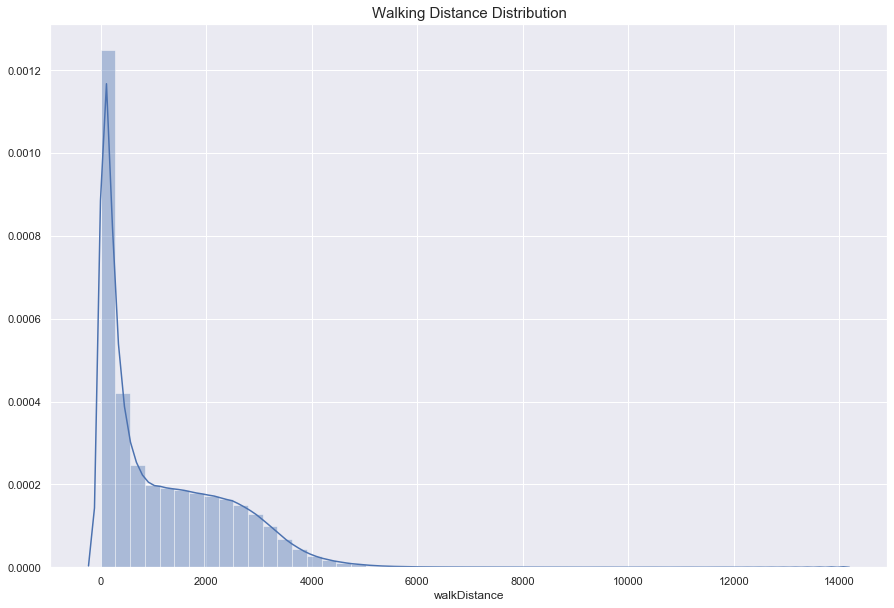

In [20]:
plt.figure(figsize=(15,10))
plt.title("Walking Distance Distribution",fontsize=15)
walkdistance = df['walkDistance']
sns.distplot(walkdistance)
plt.show();

* the above graph shows the walking distance 

In [24]:
loc, scale = norm.fit(walkdistance)
# create a normal distribution with loc and scale
n = norm(loc=loc, scale=scale)
kstest(walkdistance, n.cdf)

KstestResult(statistic=0.16476636060169814, pvalue=0.0)

* p-value < 0.05 => not normally distributed



In [25]:
print('kurtosis of distribution: {}'.format(kurtosis(walkdistance)))
print('skewness of distribution: {}'.format(skew(walkdistance)))

kurtosis of distribution: 0.942365381690883
skewness of distribution: 1.0910243808542552


* Kurtosis < 3 => platicurtic
* Skewness > 1 => positively skewed

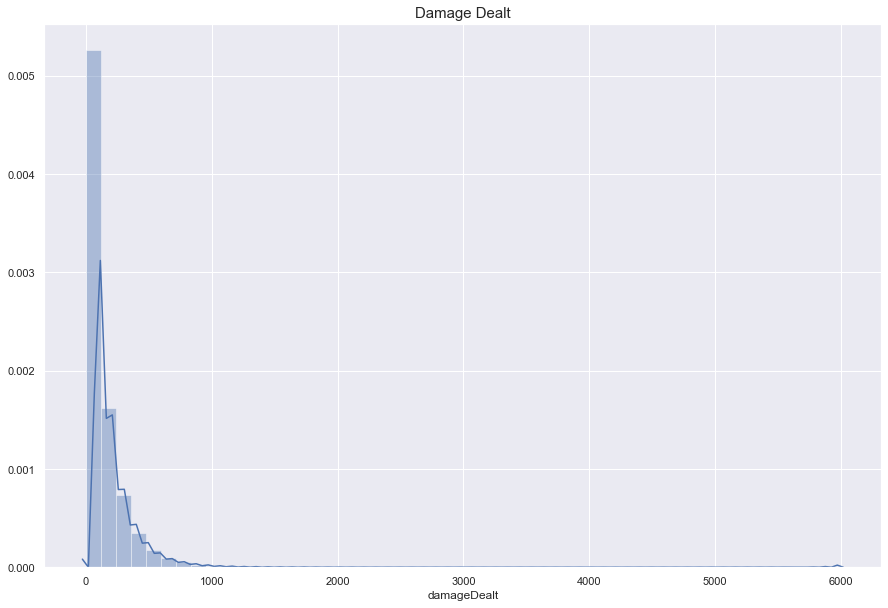

In [27]:
plt.figure(figsize=(15,10))
plt.title("Damage Dealt",fontsize=15)
damageDealt = df['damageDealt']
sns.distplot(damageDealt)
plt.show()

In [28]:
loc, scale = norm.fit(damageDealt)
# create a normal distribution with loc and scale
n = norm(loc=loc, scale=scale)
kstest(damageDealt, n.cdf)

KstestResult(statistic=0.22250595721973465, pvalue=0.0)

* p-value < 0.05 => not normally distributed



In [30]:
print('kurtosis of distribution: {}'.format(kurtosis(damageDealt)))
print('skewness of distribution: {}'.format(skew(damageDealt)))

kurtosis of distribution: 21.44170425097906
skewness of distribution: 3.014088048901527


* Kurtosis > 3 => leptocurtic
* Skewness > 1 => positively skewed

### 1. Number of enemys the player killed
This is the number of enemy players that were killed by each player.

In [31]:
# Summary statistics for the number of kills
print('The average person kills {:.4f} players'.format(df['kills'].mean()))
print('50% of people have ',df['kills'].quantile(0.50),' kills or less')
print('75% of people have ',df['kills'].quantile(0.75),' kills or less')
print('99% of people have ',df['kills'].quantile(0.99),' kills or less')
print('while the most kills recorded in the data is', df['kills'].max())

The average person kills 0.9255 players
50% of people have  0.0  kills or less
75% of people have  1.0  kills or less
99% of people have  7.0  kills or less
while the most kills recorded in the data is 72


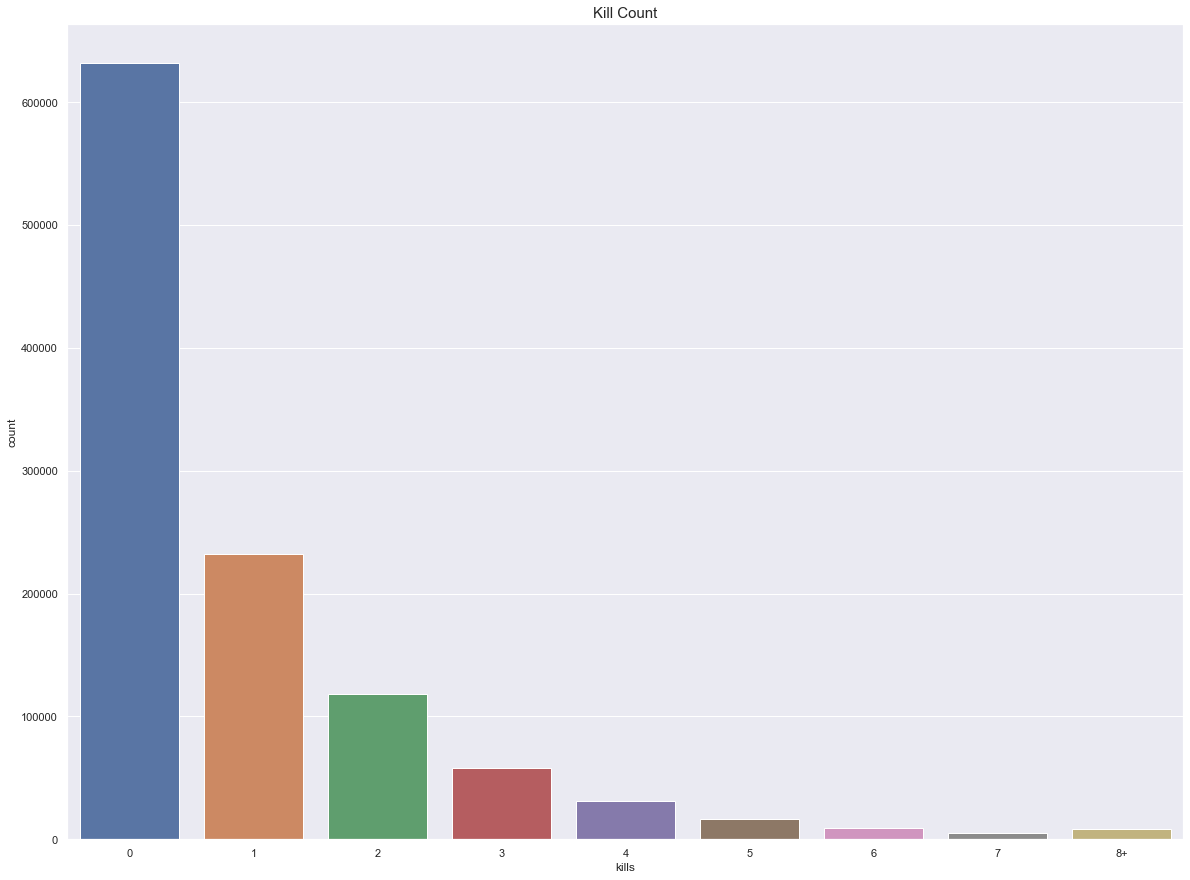

In [32]:
data = df.copy()
data.loc[data['kills'] > data['kills'].quantile(0.99)] = '8+'
plt.figure(figsize=(20,15))
sns.countplot(data['kills'].astype('str').sort_values())
plt.title('Kill Count',fontsize=15)
plt.show()


* Here is a plot of the number of players that make 1, 2, 3, ... 8+ kills in a game



### 2. Maximum number of enemy players killed in a short time.


In [33]:
# Summary statistics for the number of kills
print('The average person kills {:.4f} players in a short time'.format(df['killStreaks'].mean()))
print('50% of people have ',df['killStreaks'].quantile(0.50),' kills or less in a short time')
print('75% of people have ',df['killStreaks'].quantile(0.75),' kills or less in a short time')
print('99% of people have ',df['killStreaks'].quantile(0.99),' kills or less in a short time')
print('While the most kills in a row recorded in the data is', df['killStreaks'].max())

The average person kills 0.5449 players in a short time
50% of people have  0.0  kills or less in a short time
75% of people have  1.0  kills or less in a short time
99% of people have  3.0  kills or less in a short time
While the most kills in a row recorded in the data is 20


Lets have a look at the data for this and see if there is any correlation to our target variable "winPlacePerc".

A correlation between two random vairables describes a statistical association, which basically means how close these two random variables are to having a linear relation ship. The correlation can range between -1 and 1:

* A correlation of 1 means the variables are perfectly correlated.
* A correlation of 0 means there is no corerlation between teh variables.
* A corerlation of -1 means the variabels are prefectly negatively corerlated (This means an increase in variable 1 dsecribes a decrease in variable 2).

However, we do want to be carefull NOT to assume that a correlation between two variables means a causation

#### ii) Bivariate analysis

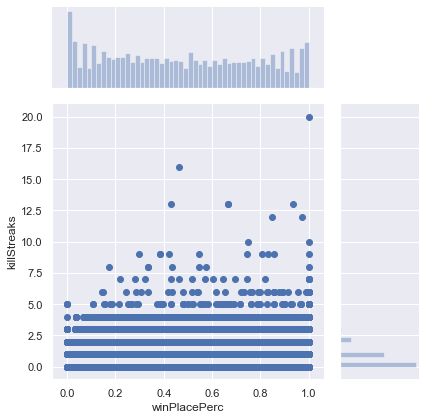

In [35]:
sns.jointplot(x='winPlacePerc', y='killStreaks', data=df, ratio=3, color='b')
plt.show();

### 3. Number of kills while in a vehicle
This is the number of enemy players killed while in a vehicle.

In [36]:
# Summary statistics for the number of kills
print('The average person kills {:.4f} players from a vehicle'.format(df['roadKills'].mean()))
print('50% of people have ',df['roadKills'].quantile(0.50),' kills or less from a vehicle')
print('75% of people have ',df['roadKills'].quantile(0.75),' kills or less from a vehicle')
print('99% of people have ',df['roadKills'].quantile(0.99),' kills or less from a vehicle')
print('While the most kills recorded from a vehicle in the data is', df['roadKills'].max())

The average person kills 0.0036 players from a vehicle
50% of people have  0.0  kills or less from a vehicle
75% of people have  0.0  kills or less from a vehicle
99% of people have  0.0  kills or less from a vehicle
While the most kills recorded from a vehicle in the data is 14


Very few players kill enemies from a vehicle. This is most likely due to 2 things:

* Its hard to shoot accurately from a moving vehicle
* My hypothesis is, that vehicles are used to escape bad situations.

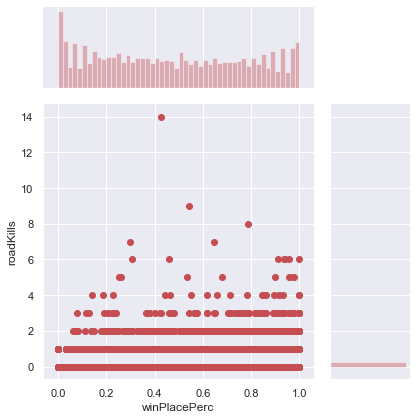

In [39]:
sns.jointplot(x='winPlacePerc', y='roadKills', data=df, ratio=3, color='r')
plt.show()

We can see there is very little correlation with making kills from a vehicle and predicting the winPlacePerc.



### 4. Number of times a player killed a team mate¶
This is the numberof times a team member kills one of there own team.

I dont think i'd wont one of these people on my team

In [40]:
# Summary statistics for the number of kills
print('The average person kills {:.4f} players on their own team'.format(df['teamKills'].mean()))
print('50% of people have killed ',df['teamKills'].quantile(0.50),' team players')
print('75% of people have killed ',df['teamKills'].quantile(0.75),' team players')
print('99% of people have killed ',df['teamKills'].quantile(0.99),' team players')
print('while the most kills recorded in the data is', df['teamKills'].max())

The average person kills 0.0240 players on their own team
50% of people have killed  0.0  team players
75% of people have killed  0.0  team players
99% of people have killed  1.0  team players
while the most kills recorded in the data is 10


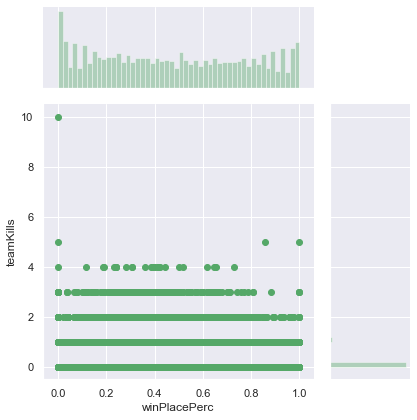

In [41]:
sns.jointplot(x='winPlacePerc', y='teamKills', data=df, ratio=3, color='g')
plt.show()


Thats a relief, there is virtually no correlation with the number of team mates you kill and the winPlacePerc. If there was, you would need to keep a close eye on your team mates in a squade game.

### 5. What about the head shot kills?
This is the number of enemies that have been killed with a head shot.

In order to make a head shot, you either have to be pretty closer or a pretty good shot.

In [42]:
# Summary statistics for the number of kills
print('The average person make {:.4f} head shots'.format(df['headshotKills'].mean()))
print('75% of people make {:.2f} head shots ',format(df['headshotKills'].quantile(0.75)))
print('99% of people make {:.2f} head shots ',format(df['headshotKills'].quantile(0.99)))
print('while the most head shots recorded in the data is', df['headshotKills'].max())

The average person make 0.2266 head shots
75% of people make {:.2f} head shots  0.0
99% of people make {:.2f} head shots  3.0
while the most head shots recorded in the data is 64


I wonder if the player that made all those head shots is the same player that had the most kills?

Spoiler Alert: Yes

In [43]:
df[df['headshotKills'] == df['headshotKills'].max()]


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
758017,06308c988bf0c2,4c4ee1e9eb8b5e,6680c7c3d17d48,7,4,5990.0,0,64,10,1,...,0,0.0,0,0.0,0,0,728.1,35,0,1.0


### 6. Damage to enemy players
We've seen that most people aren't able to kill any one, so maybe they inflict some damage to their enemies

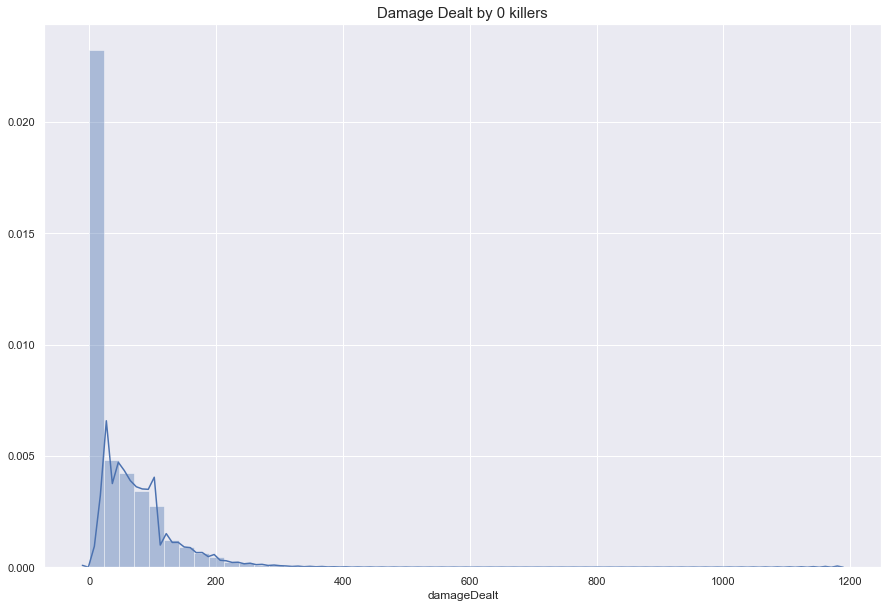

In [44]:
data = df.copy()

# Keep only those players that didn't kill anyone
data = data[data['kills']==0]
plt.figure(figsize=(15,10))
plt.title('Damage Dealt by 0 killers',fontsize=15)
sns.distplot(data['damageDealt'])
plt.show()

Here, we see a distribution of how much damage, players that dont kill anyone, can inflict on there enemies. You can see that most players dont deal out too much, this is most likely all the new players trying to figure out the controls and getting to know the game while they continually get beaten up by the more expereince players.

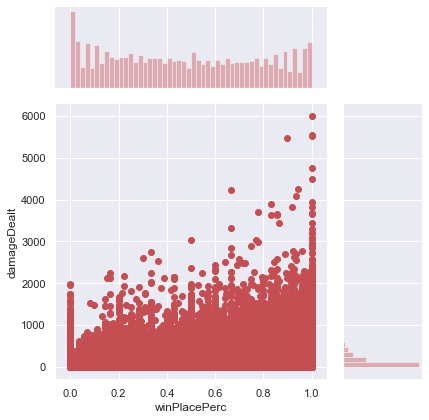

In [46]:
sns.jointplot(x='winPlacePerc', y='damageDealt', data=df ,ratio=3, color='r')
plt.show()

There is a reasonable correlation here with the damadge you deal out to enemey players and the winPlacePerc.



### How does distance travelled fare
Here we will look at the differnt forms of distance travelled and see if this has any predictive power for our tarrget variable.

We might assume that the further a player has travelled, the more likely they are to at least reach the final 10-15 players and have a higher "winPlacePerc"

### 7. Running
This is the distance travelled in metres by foot. This will be the majority of the distance for most players.

In [48]:
# Summary statistics for the distance walked.
print('The average person walks/runs {:.2f} m'.format(df['walkDistance'].mean()))
print('25% of people have walked/ran {:.2f} m or less'.format(df['walkDistance'].quantile(0.25)))
print('50% of people have walked/ran {:.2f} m or less'.format(df['walkDistance'].quantile(0.50)))
print('75% of people have walked/ran {:.2f} m or less'.format(df['walkDistance'].quantile(0.75)))
print('99% of people have walked/ran {:.2f} m or less'.format(df['walkDistance'].quantile(0.99)))
print('The longest distance travelled by feet in the data is {:.2f} m'.format(df['walkDistance'].max()))

The average person walks/runs 1153.28 m
25% of people have walked/ran 155.20 m or less
50% of people have walked/ran 684.10 m or less
75% of people have walked/ran 1975.00 m or less
99% of people have walked/ran 4393.00 m or less
The longest distance travelled by feet in the data is 13960.00 m


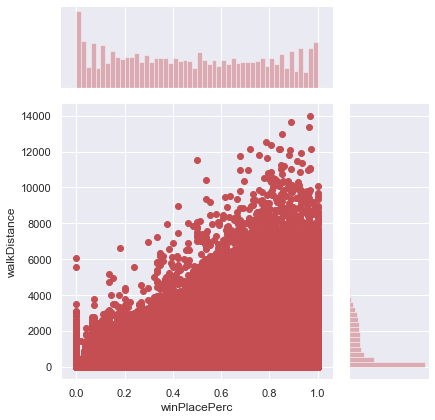

In [49]:
sns.jointplot(x='winPlacePerc', y='walkDistance', data=df, ratio=3, color='r')
plt.show()

The distance travelled by foot seems to have a higher correlation to the final position. We'll have a closer look at this later with the total distance travelled (combining walking, driving, swiming). For now, how does this compare the driving and swimming?

### 8. Driving
This is the distance in metres, travelled by vehicle.

In [50]:
# Summary statistics for the distance drove
print('The average person drove {:.2f} m'.format(df['rideDistance'].mean()))
print('50% of people have drove {:.2f} m or less'.format(df['rideDistance'].quantile(0.50)))
print('75% of people have drove {:.2f} m or less'.format(df['rideDistance'].quantile(0.75)))
print('99% of people have drove {:.2f} m or less'.format(df['rideDistance'].quantile(0.99)))
print('The longest distance travelled by vehicle in the data is {:.2f} m'.format(df['rideDistance'].max()))

The average person drove 604.21 m
50% of people have drove 0.00 m or less
75% of people have drove 0.08 m or less
99% of people have drove 6968.00 m or less
The longest distance travelled by vehicle in the data is 35400.00 m


It seems that at least 50% of people dont get there licence.



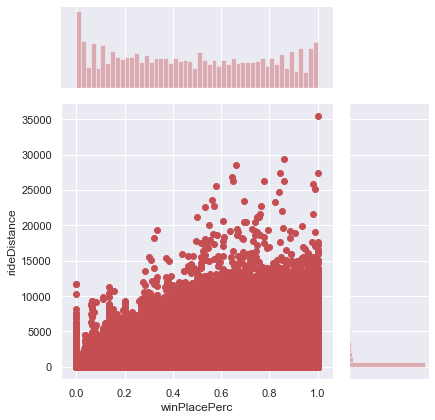

In [51]:
sns.jointplot(x='winPlacePerc', y='rideDistance', data=df, ratio=3, color='r')
plt.show()

There is some correlation with driving distance, but not as strong as walking. This is likely due to the fact that not many people actualy get a licence and drive a vehicle

### 9. Swimming
This is the distance in metres travelled through water

In [52]:
# Summary statistics for the distance drove
print('The average person drove {:.2f} m'.format(df['swimDistance'].mean()))
print('75% of people have drove {:.2f} m or less'.format(df['swimDistance'].quantile(0.75)))
print('99% of people have drove {:.2f} m or less'.format(df['swimDistance'].quantile(0.99)))
print('The longest distance travelled by vehicle in the data is {:.2f} m'.format(df['swimDistance'].max()))

The average person drove 4.55 m
75% of people have drove 0.00 m or less
99% of people have drove 123.30 m or less
The longest distance travelled by vehicle in the data is 2668.00 m


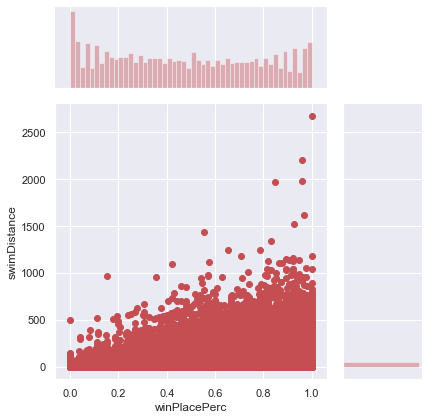

In [53]:
sns.jointplot(x='winPlacePerc', y='swimDistance', data=df, ratio=3, color='r')
plt.show()

We see that at least 75% of people dont even go in the water, this is likely related to the specific map the game is played on. Looking at the maps indicates that there is very little water to swim through, som e maps have less water than others.

Perhaps it is not a surprise then, that the correlation between swimming distance and winPlacePerc is low.

### 10. Total distance travelled
This is not an existing feature in the data, but we can combine the distance features to forma a total distance measure, so see if this has any predictive power of our target variable.

In [54]:
# Create a new feature for total distance travelled
data = df[['winPlacePerc']].copy()
data['totalDistance'] = df['walkDistance'] + df['rideDistance'] + df['swimDistance']

# Summary statistics for the total distance travelled
print('The average person travelled {:.2f} m'.format(data['totalDistance'].mean()))
print('25% of people have travelled {:.2f} m or less'.format(data['totalDistance'].quantile(0.25)))
print('50% of people have travelled {:.2f} m or less'.format(data['totalDistance'].quantile(0.50)))
print('75% of people have travelled {:.2f} m or less'.format(data['totalDistance'].quantile(0.75)))
print('99% of people have travelled {:.2f} m or less'.format(data['totalDistance'].quantile(0.99)))
print('The longest distance travelled in the data is {:.2f} m'.format(data['totalDistance'].max()))

The average person travelled 1762.04 m
25% of people have travelled 158.30 m or less
50% of people have travelled 785.40 m or less
75% of people have travelled 2724.00 m or less
99% of people have travelled 9302.00 m or less
The longest distance travelled in the data is 37312.00 m


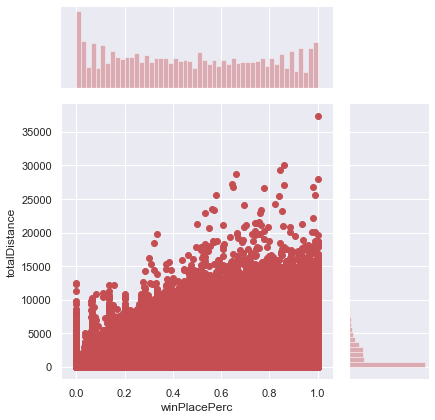

In [55]:
sns.jointplot(x='winPlacePerc', y='totalDistance', data=data, ratio=3, color='r')
plt.show()

There is a reasonably strong correlation with the total distance travelled and winning, although most of this correlation may just be due to the strong correlation with walking distance and winPlacePerc. However, one interesting item to note is that it looks like the person that travelled the longest distance didn't win, when they travelled over 37 kms in a single match.

### Some more exploration

### How does Healing and using Boosts affect the result
Healing items are used to heal yourself after you've been injured, which improves your health and allows you to continue palying the game for longer


Boost items are used by a player to increase speed and accuracy, which will allow a player to achieve more kills with weapons or get away from a fight faster.

In [56]:
# Summary statistics for the number of healing items used
print('The average person uses {:.2f} healing items'.format(df['heals'].mean()))
print('50% of people used {:.2f} healing items'.format(df['heals'].quantile(0.50)))
print('75% of people used {:.2f} healing items or less'.format(df['heals'].quantile(0.75)))
print('99% of people used {:.2f} healing items or less'.format(df['heals'].quantile(0.99)))
print('The doctor of the data used {:.2f} healing items'.format(df['heals'].max()))

The average person uses 1.37 healing items
50% of people used 0.00 healing items
75% of people used 2.00 healing items or less
99% of people used 12.00 healing items or less
The doctor of the data used 73.00 healing items


In [57]:
# Descriptive statistics for the number of boosting items used
print('The average person uses {:.2f} boosting items'.format(df['boosts'].mean()))
print('50% of people used {:.2f} boosting items'.format(df['boosts'].quantile(0.50)))
print('75% of people used {:.2f} boosting items or less'.format(df['boosts'].quantile(0.75)))
print('99% of people used {:.2f} boosting items or less'.format(df['boosts'].quantile(0.99)))
print('The addict of the data used {:.2f} boosting items'.format(df['boosts'].max()))

The average person uses 1.11 boosting items
50% of people used 0.00 boosting items
75% of people used 2.00 boosting items or less
99% of people used 7.00 boosting items or less
The addict of the data used 24.00 boosting items


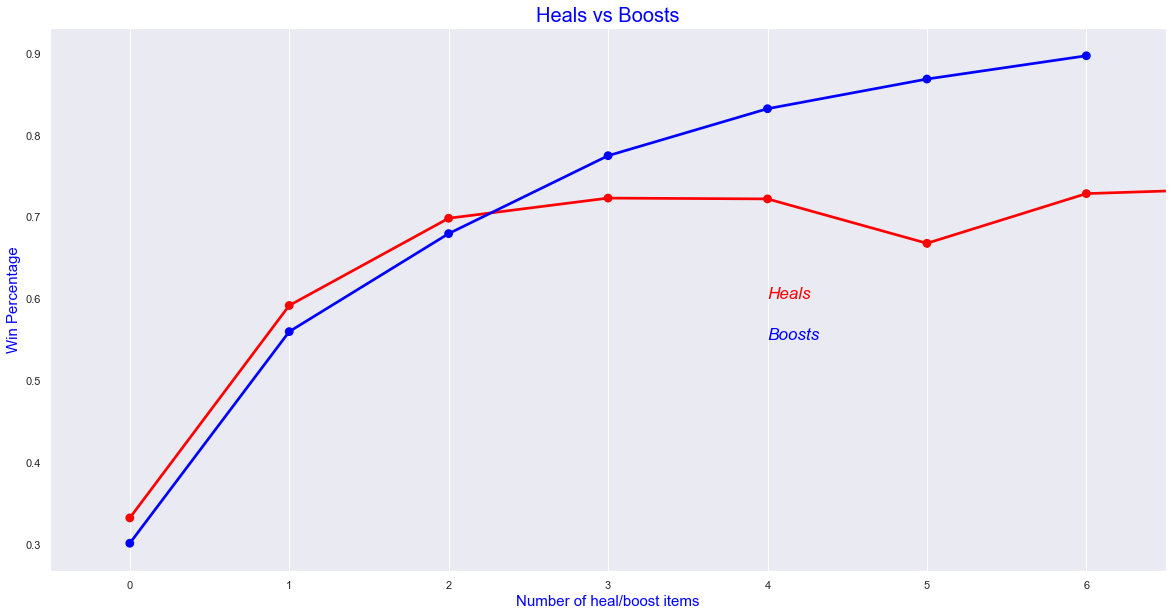

In [58]:
data = df.copy()
data = data[data['heals'] < data['heals'].quantile(0.99)]
data = data[data['boosts'] < data['boosts'].quantile(0.99)]

f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='heals',y='winPlacePerc',data=data,color='red',alpha=1.0)
sns.pointplot(x='boosts',y='winPlacePerc',data=data,color='blue',alpha=0.8)
plt.text(4,0.6,'Heals',color='red',fontsize = 17,style = 'italic')
plt.text(4,0.55,'Boosts',color='blue',fontsize = 17,style = 'italic')
plt.xlabel('Number of heal/boost items',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Heals vs Boosts',fontsize = 20,color='blue')
plt.grid()

plt.show()

Here we can see how the heal items and boost items ae used compared to each other.

This seems to indicate that using a few healing items increases your chance of winning, but you need to use more boosts to actaully achieve a change of winning.

### Does the match duration impact the winning percentage?
The match duration is simply, the time in seconds a game takes to copmplete.

You would think that the match duration has reaosnable predictive power on determining the winner, since the winner has to stay alive for the longest.



In [59]:
data = df.copy()
# Summary statistics for the total rankPoints
print('The average person lasts {:.2f} seconds'.format(data['matchDuration'].mean()))
print('The shortest game lasted {:.1f} seconds'.format(data['matchDuration'].min()))
print('25% of people last {:.1f} seconds or less'.format(data['matchDuration'].quantile(0.25)))
print('50% of people have {:.1f} seconds or less'.format(data['matchDuration'].quantile(0.50)))
print('75% of people have {:.1f} seconds or less'.format(data['matchDuration'].quantile(0.75)))
print('99% of people have {:.1f} secondsor less'.format(data['matchDuration'].quantile(0.99)))
print('The longest game lasted {:.1f} seconds'.format(data['matchDuration'].max()))

The average person lasts 1579.35 seconds
The shortest game lasted 133.0 seconds
25% of people last 1367.0 seconds or less
50% of people have 1438.0 seconds or less
75% of people have 1851.0 seconds or less
99% of people have 2054.0 secondsor less
The longest game lasted 2237.0 seconds


In [60]:
data.corr()['winPlacePerc']['matchDuration']


-0.005709820962195624

We can see that there are many games that last a varying amount of time with varying results. Its clear that there is no predictive power in this feature.

Lets have a look at the match duration for all the winners.

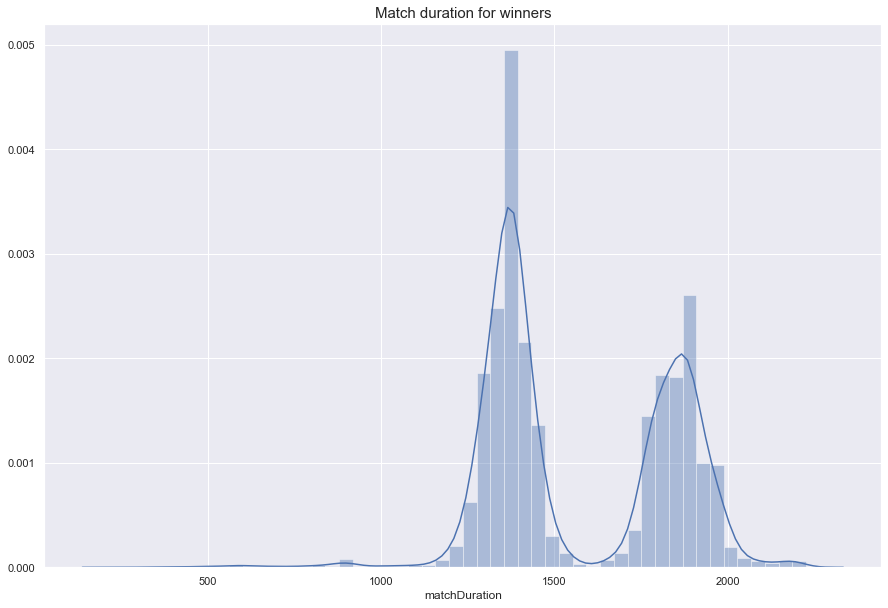

In [61]:
# Keep only the players that won the match
data = df[df['winPlacePerc'] == 1]

plt.figure(figsize=(15,10))
plt.title('Match duration for winners',fontsize=15)
sns.distplot(data['matchDuration'])
plt.show()

It appears that the match duration has no bearing on the winPlacePerc. Apparently you can even win the game in just over 2 min, but more commonly the game is won in approximately 1400 or 1850 seconds.

The match Duration is not a feature that is likely to be useful in predicting the winPlacePer.

### What is the distribution of match type
There are 16 seperate modes of game play, many of which are different versions of each other with first person perspective or third person perspective. I will combine these into 4 seperate game play modes:

* Solo: Hunger Games style, last man/women standing.
* Duo: Teams of two against all other players.
* Squad: Teams of up to 4 players against All other players
* Other: These modes consist of custom and special events modes

In [62]:
modes = set(df['matchType'])
print (modes)

{'duo', 'crashtpp', 'solo-fpp', 'normal-squad', 'squad-fpp', 'crashfpp', 'normal-solo', 'squad', 'normal-solo-fpp', 'flaretpp', 'normal-duo-fpp', 'normal-squad-fpp', 'flarefpp', 'normal-duo', 'solo', 'duo-fpp'}


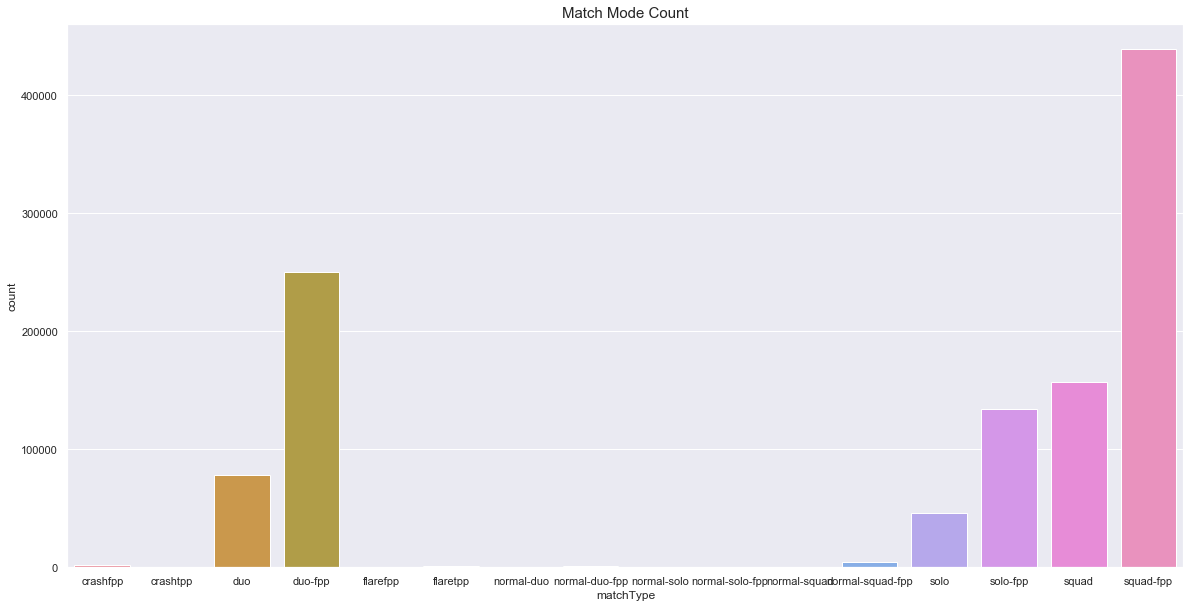

In [63]:
plt.figure(figsize=(20,10))
sns.countplot(df['matchType'].sort_values())
plt.title('Match Mode Count',fontsize=15)
plt.show()

### Correlation of each Feature for each game mode.
We'll have a look at each game mode individually and calculate the correlation of each feature with our target variable, the "winPlacePerc".

In [65]:
solo = data[data['matchType'] == 'solo']
duo = data[data['matchType'] == 'duo']
squad = data[data['matchType'] == 'squad']
other = data[data['matchType'] == 'Other']

print("There are {0:} ({1:.2f}%) solo games,".format(len(solo),100*len(solo)/len(data)))
print("There are {0:} ({1:.2f}%) duo games,".format(len(duo),100*len(duo)/len(data)))
print("There are {0:} ({1:.2f}%) squad games,".format(len(squad),100*len(squad)/len(data)))
print("There are {0:} ({1:.2f}%) Other games,".format(len(other),100*len(other)/len(data)))

There are 684 (2.15%) solo games,
There are 1656 (5.20%) duo games,
There are 5759 (18.08%) squad games,
There are 0 (0.00%) Other games,


In [68]:
# Create a data set with the game modes seperated
data = [solo,duo,squad,other,df]
# This is just a list of all the features 
features = ['assists','boosts','damageDealt','DBNOs','headshotKills','heals',
            'killPlace','killPoints','kills','killStreaks','longestKill',
            'maxPlace','numGroups','rankPoints','revives',
            'rideDistance','roadKills','swimDistance','teamKills',
            'vehicleDestroys','walkDistance','weaponsAcquired','winPoints']
        
# Calculate the correlation matrix for each game mode, and take only the correlation of the feature with the target variable.
solo_correlation = solo.corr()['winPlacePerc']
duo_correlation = duo.corr()['winPlacePerc']
squad_correlation = squad.corr()['winPlacePerc']
other_correlation = other.corr()['winPlacePerc']
All_correlation = df.corr()['winPlacePerc']

correlation = [solo_correlation, duo_correlation, squad_correlation, other_correlation, All_correlation]

### Pearson correlation between all features


>Pearson's correlation coefficient between two variables is defined as the covariance of the two variables divided by the product of their standard deviations.

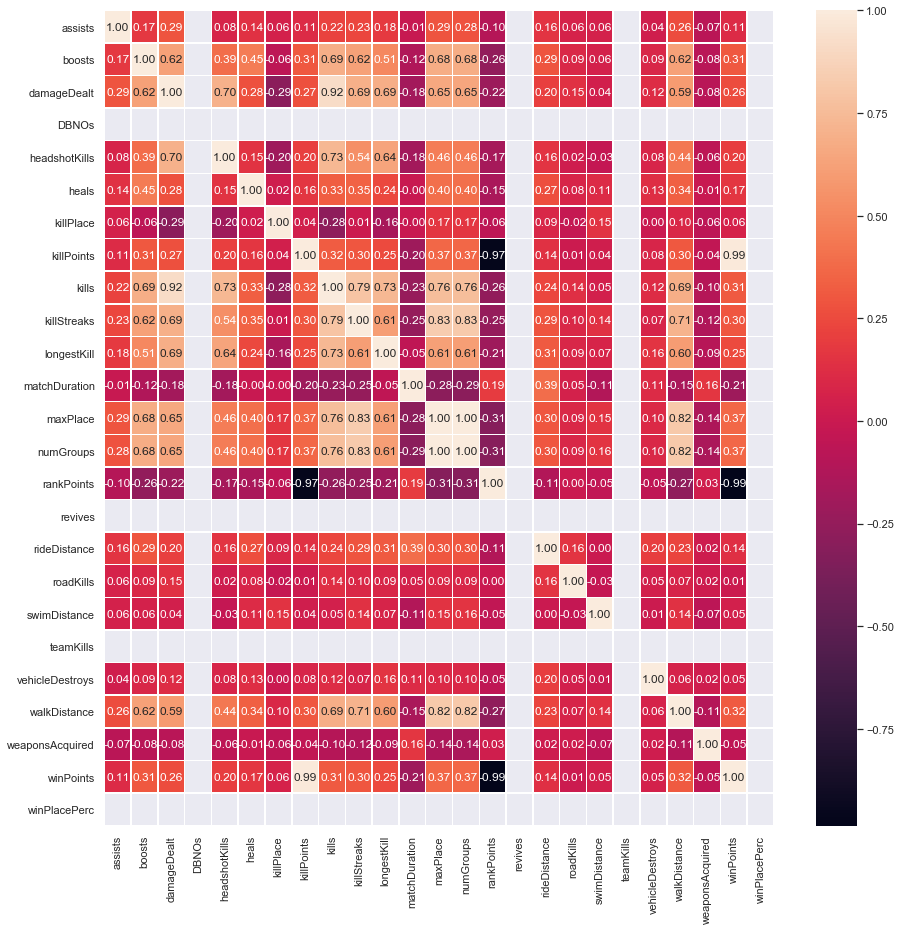

In [70]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(solo.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)
plt.show()

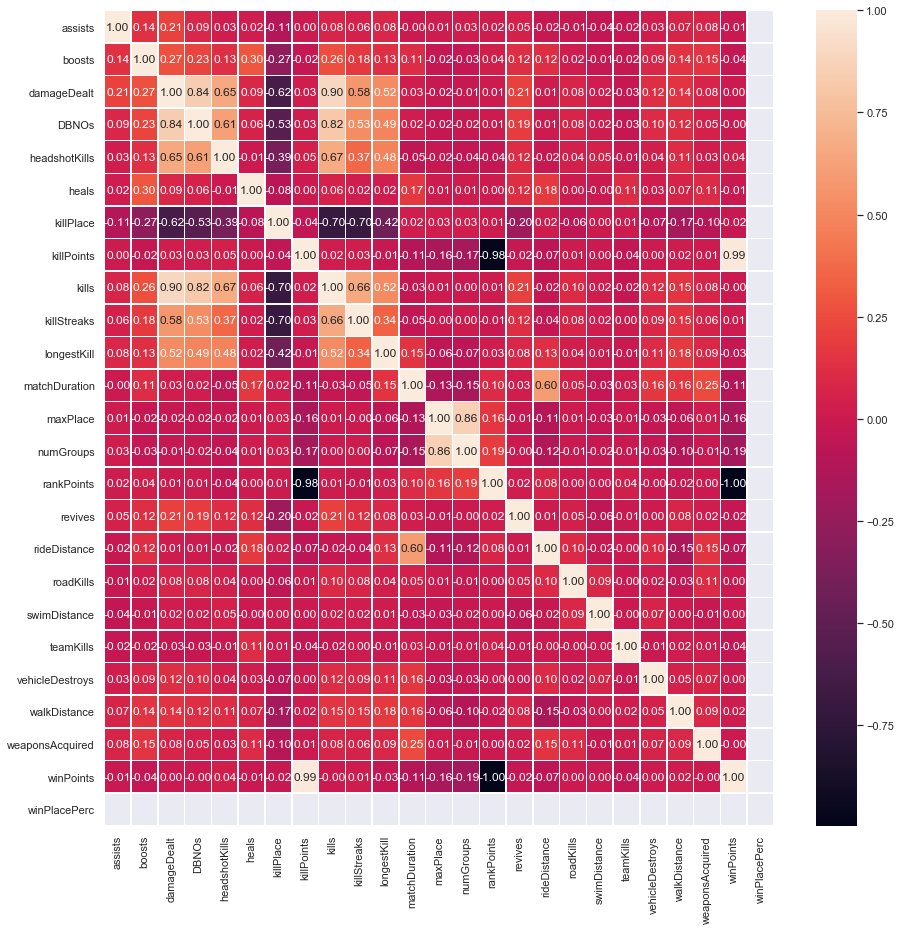

In [71]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(duo.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)
plt.show()

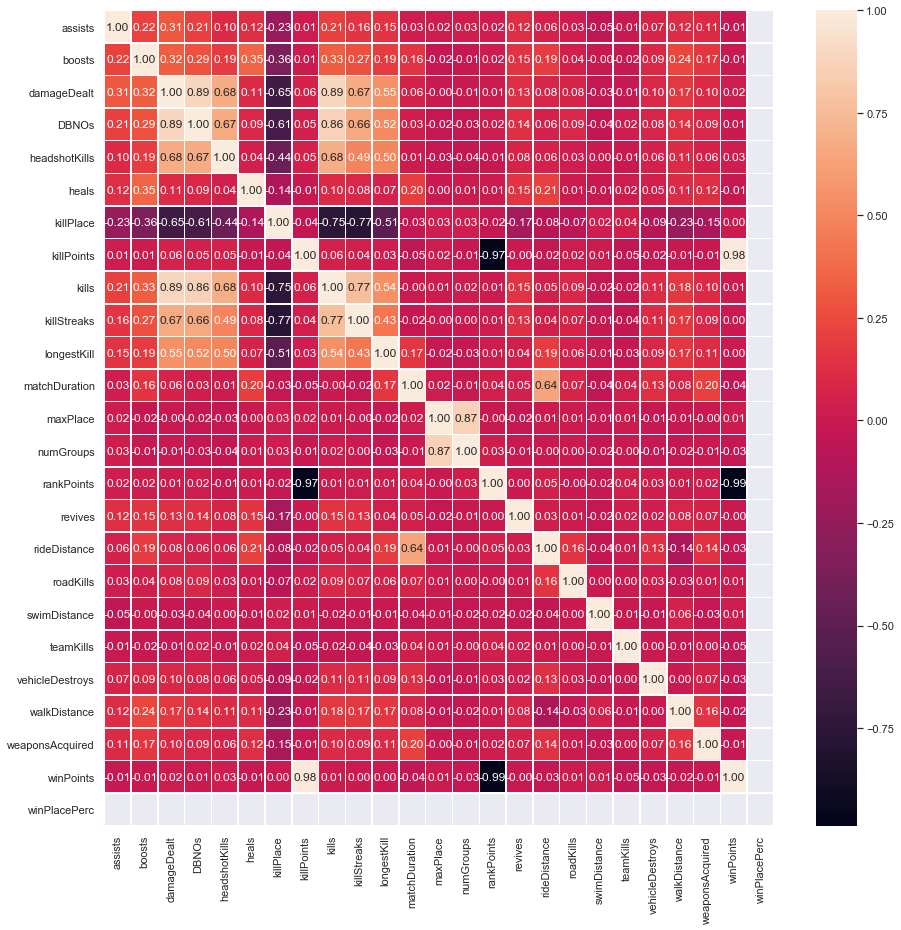

In [72]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(squad.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)
plt.show()

### 5. Conclusion

* So from the given dataset we performed EDA
* There was an missing value in winPlacePerc column we figured it out and decided to remove it as there needs to be more than one player to play the game in order to win, we make the assumption that this matchID is invalid.so we removed it
* We analysed maximum number of enemy players killed in a short time
* We analysed number of kills in avehicle and came to conclusion that very few players kill enemies from a vehicle 
* No we checked the correlation between number of player killed a team mate and came to conclusion that there is virtually no correlation with the number of team mates you kill and the winPlacePerc. If there was, you would need to keep a close eye on your team mates in a squade game.
* We also checked for headshots and found the player that made all those head shots is the same player that had the most kills
* There is a reasonable correlation here with the damadge you deal out to enemey players and the winPlacePerc
* The distance travelled by foot seems to have a higher correlation to the final position. 
* It seems that at least 50% of people dont get there licence.
* There is a reasonably strong correlation with the total distance travelled and winning, although most of this correlation may just be due to the strong correlation with walking distance and winPlacePerc. 
* A few healing items increases your chance of winning, but you need to use more boosts to actaully achieve a change of winning
* We can see that there are many games that last a varying amount of time with varying results. Its clear that there is no predictive power in this feature
* It appears that the match duration has no bearing on the winPlacePerc. Apparently you can even win the game in just over 2 min, but more commonly the game is won in approximately 1400 or 1850 seconds.

* The match Duration is not a feature that is likely to be useful in predicting the winPlacePer.
* Most games played in this data set are squad games.

* Looking at the numbers, its almost like the number of players is related to the amount of data in each match mode, ie twice as many games of duo and approx four times as many games in squad mode than there are in solo.


# THANK YOU